# **Model Setup**

In [ ]:
# install python packages required to solve model
!pip install pulp
!pip install gurobipy
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# census tract information
ct = pd.read_csv('../data/2023Stocking_2010CT_HVI.csv', index_col = 0)

# zone information
zones = pd.read_csv('../data/Zones_Year_Assignment.csv', index_col = 0)
zones.columns = zones.columns.str.strip()
zones.set_index("Unique", inplace = True)

# set of zones
I = zones.index.tolist()
print(I)

# set of years in the 9-year cycle
Y = [i for i in range(9)]
print(Y)

# Zone ID → Community Board
community_boards = zones["Community Board"].to_dict()
print(community_boards)

# Zone ID → HVI
hvi_scores = zones["HVI"].to_dict()
print(hvi_scores)

# Zone ID → Tree planting potential
planning_potentials = zones["Planting Potential"].to_dict()
print(planning_potentials)

# list of zones with an HVI score of 4 or 5
high_HVI_zones = [i for i in I if zones.loc[i, "HVI 4/5 Count"] == 1]
print(high_HVI_zones)

min_hvi = zones["HVI"].min()
max_hvi = zones["HVI"].max()

# Scaling function of HVI scores
def hvi_weight(hvi):
    # aggressive
  # return (hvi / 5) ** 3
    # smoother curve
  # return 1 / (1 + np.exp(-(hvi - 3)))
    # HVI is linearly weighted
  return 1 + 4 * (hvi - min_hvi) / (max_hvi - min_hvi)


# time penalty encouraging high-HVI zones to be assigned earlier in the cycle
def time_weight(j):
  n_years = len(Y)
  return np.exp(-0.1 * (j - 1))

['101_1', '101_2', '101_3', '101_4', '101_5', '101_6', '101_7', '102_1', '102_2', '102_3', '102_4', '102_5', '103_1', '103_2', '103_3', '103_4', '103_5', '103_6', '104_1', '104_2', '104_3', '104_4', '104_5', '105_1', '105_10', '105_11', '105_12', '105_2', '105_3', '105_4', '105_5', '105_6', '105_7', '105_8', '105_9', '106_1', '106_2', '106_3', '106_4', '106_5', '107_1', '107_2', '107_3', '107_4', '108_1', '108_2', '108_3', '108_4', '108_5', '109_1', '109_2', '109_3', '109_4', '110_1', '110_2', '110_3', '111_1', '111_2', '111_3', '111_4', '111_5', '112_1', '112_2', '112_3', '112_4', '112_5', '112_6', '112_7', '201_1', '201_2', '201_3', '201_4', '202_1', '202_2', '203_1', '203_2', '203_3', '203_4', '204_1', '204_2', '204_3', '204_4', '205_1', '205_2', '205_3', '206_1', '206_2', '206_3', '207_1', '207_2', '207_3', '207_4', '207_5', '208_1', '208_10', '208_11', '208_2', '208_3', '208_4', '208_5', '208_6', '208_7', '208_8', '208_9', '209_1', '209_10', '209_2', '209_3', '209_4', '209_5', '20

In [7]:
ct

,OBJECTID,BoroName,BoroCT2010,PUMA,NTAName,NTACode,Shape_Leng,Borough,ONENYC_HVI,QUINTILES,...,TC2015.stem_count,TC2015.stump_count,TC2015.stocking_percent_deficit,TC2015.max_trees,TC2015.trees_to_add,TC2015.stocking_percent,TC2015.trees_to_add_70perc,2023TreesToAdd_70Perc,Block_Length_Sum,Trees_to_Add_per_1000_Feet
BoroCD,,,,,,,,,,,,,,,,,,,,,
1,1,Staten Island,5000900,3903,West New Brighton-New Brighton-St. George,SI22,7729.016600,5,-3.258102,1,...,269,6,0.236798,381,118,0.689928,83,91.0,24481.77128,3.717051
2,2,Staten Island,5002700,3903,Stapleton-Rosebank,SI37,6745.559749,5,-0.277956,3,...,295,14,0.056716,323,42,0.86894,30,14.0,17279.78767,0.810195
3,3,Staten Island,5002900,3903,Stapleton-Rosebank,SI37,10895.072440,5,-0.450569,3,...,544,9,0.447322,767,232,0.69782,162,103.6,48612.32223,2.131147
4,4,Staten Island,5003300,3903,Grymes Hill-Clifton-Fox Hills,SI08,18603.925060,5,-5.601794,1,...,354,10,0.798289,825,481,0.417008,337,347.2,57694.84794,6.017868
5,5,Staten Island,5003900,3903,Grymes Hill-Clifton-Fox Hills,SI08,11523.702270,5,-6.500620,1,...,334,3,0.236315,478,147,0.692722,103,118.3,30316.44182,3.902173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,2162,Brooklyn,3068600,4009,Georgetown-Marine Park-Bergen Beach-Mill Basin,BK45,6255.090822,3,-1.192089,2,...,222,2,0.095793,255,35,0.862266,25,23.1,15202.01371,1.519536
2311,2163,Brooklyn,3069800,4009,Georgetown-Marine Park-Bergen Beach-Mill Basin,BK45,27352.744280,3,0.088233,3,...,240,4,0.340751,405,169,0.582346,118,113.4,28652.36524,3.957788
2312,2164,Bronx,2037600,3702,Williamsbridge-Olinville,BX44,5797.771749,2,-0.364435,3,...,111,2,0.235094,185,76,0.587843,53,59.5,12219.44297,4.869289


In [8]:
zones

,BoroName,Community Board,Council District,Zone ID,Planting Potential,Year,HVI,HVI 4/5 Count,CT Count,Transition Contract,Transition Overlap %,New Year Assignment
Unique,,,,,,,,,,,,
101_1,Manhattan,101,1,1,146,1,1.3,0,1,MG-124M,100,8
101_2,Manhattan,101,1,2,141,1,2.7,0,2,0,0,2
101_3,Manhattan,101,1,3,172,4,1.0,0,1,0,0,2
101_4,Manhattan,101,1,4,154,4,1.3,0,8,MG-124M,43,5
101_5,Manhattan,101,1,5,249,7,3.0,0,1,MG-124M,100,8
...,...,...,...,...,...,...,...,...,...,...,...,...
503_2,Staten Island,503,50,2,1302,3,1.0,0,7,0,0,3
503_3,Staten Island,503,51,3,1295,2,1.0,0,7,0,0,2
503_4,Staten Island,503,51,4,1224,1,1.0,0,4,0,0,1


In [23]:
#additional fields for objective function

# Generate example proxy values
np.random.seed(42)  # for reproducibility
sim_pgi = {i: np.random.uniform(0, 1) for i in I}           # float [0, 1]

trees_per_1000ft = {i: np.random.normal(0.0, 1.0) for i in I}  # Higher = more physical planting opportunity
stocking_deficit = {i: np.random.normal(0.0, 5.0) for i in I} # Higher = more need for canopy fill-in

# number of cts in each zone; more cts -> more people -> larger impact
ct_count_weight = zones['CT Count'].to_dict()

def normalize_dict(d):
    vals = np.array(list(d.values()))
    return {k: (v - vals.min()) / (vals.max() - vals.min()) for k, v in d.items()}


# ONLY HVI Model

In [ ]:
from ast import keyword
model4 = LpProblem("Tree_Planting_Scheduling", LpMaximize)

# DECISION VARIABLES
  # x[i,j] = 1 if zone i is assigned to year j
x = {(i, j): LpVariable(f"x_{i}_{j}", cat="Binary") for i in I for j in Y}

  # p[i,j] is the # of trees planted in zone i in year j
p = {
    (i, j): LpVariable(f"p_{i}_{j}", lowBound=0, upBound=planning_potentials[i])
    for i in I for j in Y
}


# CONSTRAINTS

# 1. Each zone must be scheduled exactly once across 9 years
for i in I:
    model4 += lpSum(x[i, j] for j in Y) == 1, f"VisitOnce_{i}"

# 2. CB-Year tree capacity constraint (≤1299 trees per CB per year)
unique_cbs = set(community_boards.values())
for cb in unique_cbs:
    cb_tracts = [i for i in I if community_boards[i] == cb]
    for j in Y:
        model4 += (
            lpSum(p[i,j] for i in cb_tracts) <= 1299,
            f"Capacity_CB{cb}_Year{j}"
        )


# 2.5. Handle CBs that exceed the 1300 limit
# PLEASE ADJUST overflow_cbs TO DATA
overflow_cbs = [412, 413, 414, 502, 503]

# Binary overflow flags
overflow_cb_var = {(cb, j): LpVariable(f"overflow_{cb}_{j}", cat="Binary")
               for cb in overflow_cbs for j in Y}

# Allow 1300 + delta if overflow_cb is used

# PLEASE ADJUST delta
delta = 1000
for cb in [412, 413, 414, 502, 503]:
    cb_tracts = [i for i in I if community_boards[i] == cb]
    for j in Y:
        model4 += (
            lpSum(p[i,j] for i in cb_tracts) <= 1299 + delta * overflow_cb_var[(cb, j)]
        )

# At most 1 overflow per CB per year
for j in Y:
    model4 += lpSum(overflow_cb_var[(cb, j)] for cb in [412, 413, 414, 502, 503]) <= 1


# 3. Trees can only be planted in a given zone in a given year if it is assigned to that year
for i in I:
  for j in Y:
    model4 += p[i,j] <= planning_potentials[i] * x[i,j]


# 4. Visit at least one zone in one CB every 3 years in the cycle
cb_set = set(community_boards.values())
for cb in cb_set:
    cb_tracts = [i for i in I if community_boards[i] == cb]
    if len(cb_tracts) > 2:
      for start in [0,3,6]:
        three_y_block = range(start, start+3)
        model4 += lpSum(x[i,j] for i in cb_tracts for j in three_y_block) >= 1
    else:
      model4 += lpSum(x[i,j] for i in cb_tracts for j in Y) == len(cb_tracts)


# 5. Balance constraint in # of Trees Planted
trees_per_year = {
    j: lpSum(p[i, j] for i in I)
    for j in Y
}

for j in Y:
  # cannot plant more than 20000 trees per year
  model4 += trees_per_year[j] <= 20000
  # best not to plant below 5000 trees per year, can change
  model4 += trees_per_year[j] >= 5000


# Pairwise deviation variables - dictionary mapping from pair of years (1-9)
# to their difference in # of trees planted (p[i,j])
pairwise_deviation_vars = {}

for j1 in Y:
    for j2 in Y:
        if j1 < j2:
            var_name = f"dev_{j1}_{j2}"
            pairwise_deviation_vars[(j1, j2)] = LpVariable(var_name, lowBound=0)

            # Absolute deviation constraints
            model4 += trees_per_year[j1] - trees_per_year[j2] <= pairwise_deviation_vars[(j1, j2)]
            model4 += trees_per_year[j2] - trees_per_year[j1] <= pairwise_deviation_vars[(j1, j2)]

# Cap on total deviation across all pairs
model4 += lpSum(pairwise_deviation_vars.values()) <= 10000, "TotalPairwiseDeviationCap"


# 6. For each zone, if it was visited within the last 'cooldown' years in the previous cycle,
# cannot plant it in the first 'cooldown - (9 - y_last)' years of the current cycle

# cooldown period in years
cooldown = 5

for unique_id, row in zones.iterrows():
  if pd.isnull(row["New Year Assignment"]):
        print(f"Zone {i} skipped due to missing prior assignment")
        continue
  y_last = int(row["New Year Assignment"]) - 1
  earliest_allowed_year = min(8, y_last + cooldown - 9)

  if earliest_allowed_year > 8:
    print(f"Zone {i}: Cooldown ends in year {earliest_allowed_year + 1}, beyond planning horizon.")

  for j in Y:
    if earliest_allowed_year > 8:
      print(f"Zone {i} cannot be scheduled due to cooldown ending after last year.")
    if j < earliest_allowed_year:
      model4 += x[unique_id, j] == 0
      model4 += p[unique_id, j] == 0

# ONLY-HVI OBJECTIVE
model4 += lpSum(
    hvi_weight(hvi_scores[i]) *
    # ct_count_weight[i] *
    time_weight(j) *
    p[i, j]
    for i in I for j in Y
)

# MULTI-OBJECTIVE FUNCTION 
# alpha = 0.3
# beta = 0.3
# gamma = 0.3

# model4 += lpSum(
#     (
#         hvi_weight(hvi_scores[i]) +
#         alpha * trees_per_1000ft[i] +
#         beta * stocking_deficit[i] +
#         gamma * (1 - sim_pgi[i])
#     ) *
#     time_weight(j) *
#     p[i, j]
#     for i in I for j in Y
# ), "Maximize_Impact_Composite"

# SOLVE
from pulp import PULP_CBC_CMD
model4.solve(PULP_CBC_CMD(msg=True, timeLimit=600))
if LpStatus[model4.status] != "Optimal":
    print("WARNING: No feasible solution found. Status =", LpStatus[model4.status])
else:
    print("Optimal solution found! Objective =", value(model4.objective))

zones_per_year = np.zeros(9)
for var in model4.variables():
    if var.varValue is not None and var.varValue > 1e-10:
        name = var.name
        parts = name.split('_')
        var_type = parts[0]
        year = parts[-1]
        shifted_year = str(int(year) + 1)
        tract_id = "_".join(parts[1:-1])
        if var_type == "p":
          print(f"Census Tract: {tract_id} is assigned to Year: {shifted_year}, {round(var.varValue)} trees to plant")
        else:
          zones_per_year[int(year)] += 1

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/75/vd_hn7vj3996l4xb0lb6kgkh0000gn/T/d98c08b1341245b68b6f6dcda482f26e-pulp.mps -max -sec 600 -timeMode elapsed -branch -printingOptions all -solution /var/folders/75/vd_hn7vj3996l4xb0lb6kgkh0000gn/T/d98c08b1341245b68b6f6dcda482f26e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5992 COLUMNS
At line 105956 RHS
At line 111944 BOUNDS
At line 119550 ENDATA
Problem MODEL has 5987 rows, 7641 columns and 88533 elements
Coin0008I MODEL read with 0 errors
seconds was changed from 1e+100 to 600
Option for timeMode changed from cpu to elapsed
Continuous objective value is 331419 - 0.13 seconds
Cgl0002I 468 variables fixed
Cgl0008I 9 inequality constraints converted to equality constraints
Cgl0003I 0 fixed, 0 tightened bounds, 46 strengthened rows, 0 substitutions
Cgl0003

# **Save New Schedule**

In [11]:
import pandas as pd

assignments_x = []
assignments_p = []

for i in I:
    for j in Y:
        var_x = x[i, j]
        var_p = p[i, j]

        if var_x.varValue is not None and var_x.varValue > 0.5:
            assignments_x.append((i, j+1, var_x.varValue))

        if var_p.varValue is not None and var_p.varValue > 0.5:
            # (zone, year, trees)
            assignments_p.append((i, j+1, var_p.varValue))

start_year = 2036
end_year = 2045
assign_col = f"{start_year}-{end_year}_Assignment"
trees_col = f"{start_year}-{end_year}_trees_to_plant"

df_assign = pd.DataFrame(assignments_p, columns=['Zone', assign_col, trees_col])

df_updated = zones.merge(df_assign.set_index('Zone'),
                         left_index=True, right_index=True, how='left')

df_updated.to_csv(f"Zones_Year_Assignment_{start_year}_{end_year}.csv")

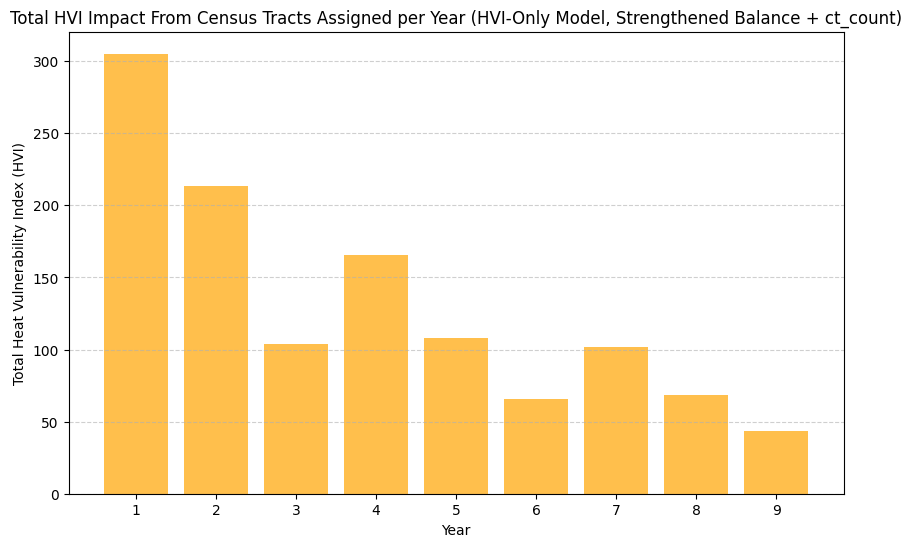

In [25]:
import matplotlib.pyplot as plt

assignments = []
for i in I:
    for j in Y:
        var = x[i,j]
        if var.varValue is not None and var.varValue > 0.5:
            assignments.append((i, j, hvi_scores[i]))

df_assign = pd.DataFrame(assignments, columns=['Tract', 'Year', 'HVI'])

hvi_per_year = df_assign.groupby('Year')['HVI'].sum().reset_index()
hvi_per_year['Year_adj'] = hvi_per_year['Year'] + 1
plt.figure(figsize=(10,6))
plt.bar(hvi_per_year['Year_adj'], hvi_per_year['HVI'], color='orange', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total Heat Vulnerability Index (HVI)')
plt.title('Total HVI Impact From Census Tracts Assigned per Year (HVI-Only Model, Strengthened Balance + ct_count)')
plt.xticks(hvi_per_year['Year_adj'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

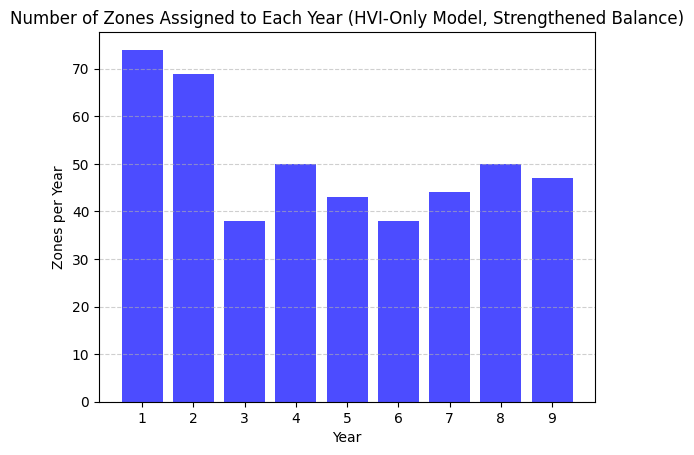

In [26]:
plt.bar(hvi_per_year['Year_adj'], zones_per_year, color='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Zones per Year')
plt.title('Number of Zones Assigned to Each Year (HVI-Only Model, Strengthened Balance)')
plt.xticks(hvi_per_year['Year_adj'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

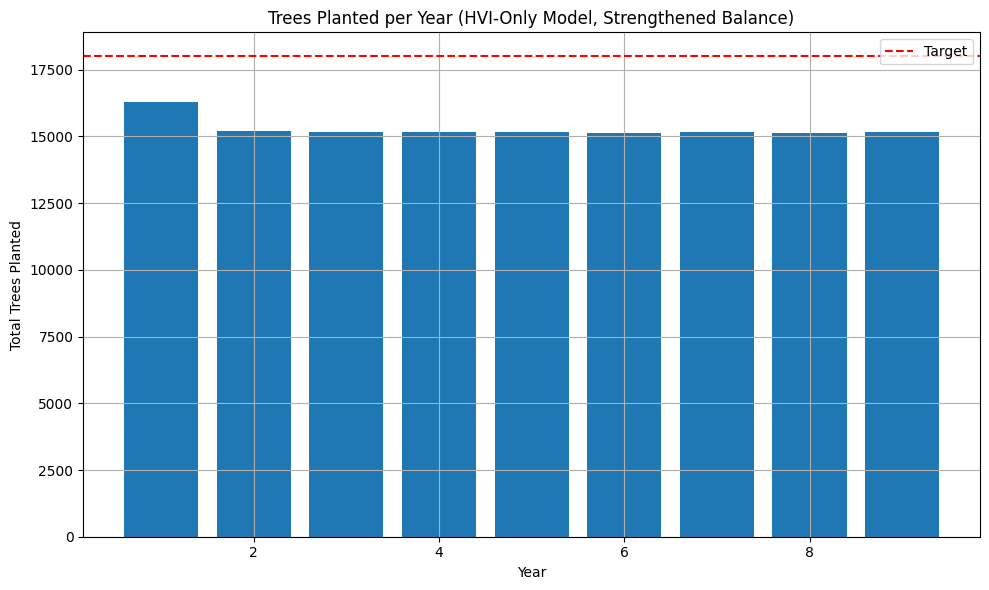

In [27]:
tree_totals = np.zeros(len(Y))
for (i, j) in p:
    if p[i, j].varValue is not None:
        tree_totals[j] += p[i, j].varValue

plt.figure(figsize=(10, 6))
plt.bar([y+1 for y in Y], tree_totals)
plt.axhline(18000, color='red', linestyle='--', label="Target")
plt.xlabel("Year")
plt.ylabel("Total Trees Planted")
plt.title("Trees Planted per Year (HVI-Only Model, Strengthened Balance)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

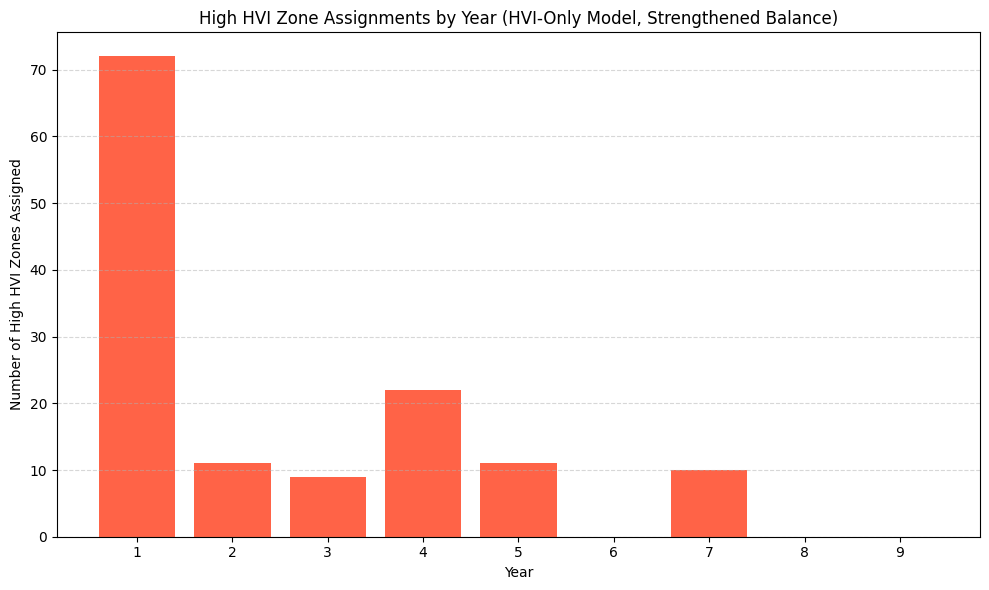

In [28]:
high_hvi_counts = np.zeros(len(Y))

# for var in model4.variables():
#     if var.name.startswith("x_") and var.varValue == 1:
#         parts = var.name.split("_")
#         i = "_".join(parts[1:-1])  # zone ID
#         j = int(parts[-1])         # year index

#         if hvi_scores[i] >= 4:
#             high_hvi_counts[j] += 1

for var in model4.variables():
    if var.name.startswith("x_") and var.varValue == 1:
        parts = var.name.split("_")
        i = "_".join(parts[1:-1])
        j = int(parts[-1]) + 1  # Planning year (1-based)

        hvi = round(hvi_scores[i])  # Consistent with second plot

        if hvi >= 4:
            high_hvi_counts[j - 1] += 1

years = np.arange(1, 10)

plt.figure(figsize=(10, 6))
plt.bar(years, high_hvi_counts, color="tomato")
plt.xlabel("Year")
plt.ylabel("Number of High HVI Zones Assigned")
plt.title("High HVI Zone Assignments by Year (HVI-Only Model, Strengthened Balance)")
plt.xticks(years)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
high_hvi_zone_ids = [i for i, score in hvi_scores.items() if score >= 4]
print(f"Total high-HVI zones in data: {len(high_hvi_zone_ids)}")

# Count high-HVI zones assigned per year
high_HVI_counts = np.zeros(len(Y))  # assuming Y is your list/range of years

for var in model4.variables():
    if var.name.startswith("x_") and var.varValue == 1:
        parts = var.name.split("_")
        i = "_".join(parts[1:-1])  # zone id
        j = int(parts[-1])         # year index
        if hvi_scores.get(i, 0) >= 4:  # safer with get()
            high_HVI_counts[j] += 1

print("High-HVI zones assigned per year (model):")
for year, count in enumerate(high_HVI_counts, start=1):
    print(f"Year {year}: {int(count)} zones")

print(f"Total high-HVI zones assigned (model): {int(high_HVI_counts.sum())}")


Total high-HVI zones in data: 82
High-HVI zones assigned per year (model):
Year 1: 41 zones
Year 2: 7 zones
Year 3: 5 zones
Year 4: 17 zones
Year 5: 7 zones
Year 6: 0 zones
Year 7: 5 zones
Year 8: 0 zones
Year 9: 0 zones
Total high-HVI zones assigned (model): 82


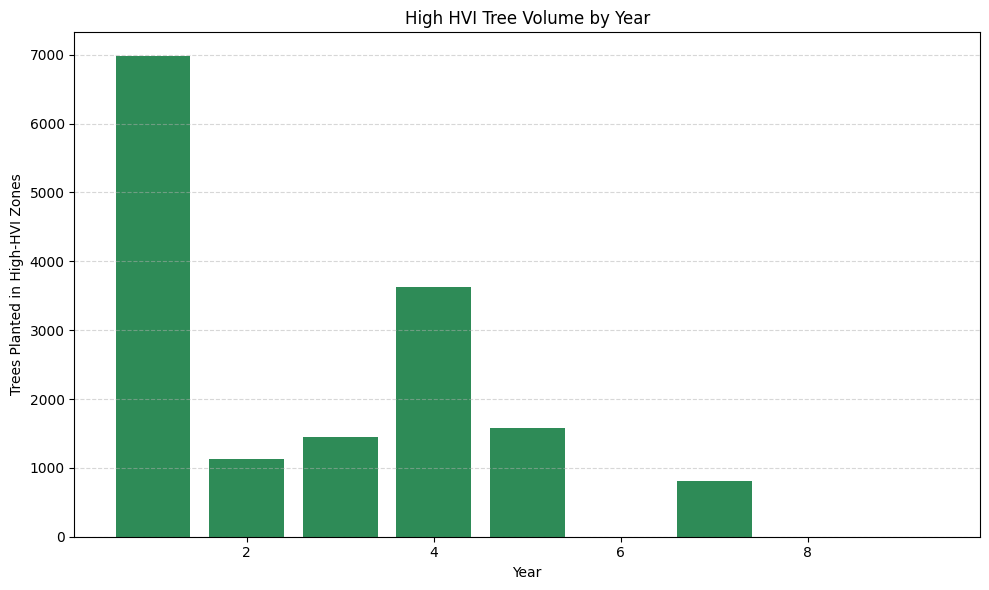

In [30]:
hvi_tree_volume = np.zeros(9)

for (i, j), var in p.items():
    if hvi_scores[i] >= 4 and var.varValue:
        hvi_tree_volume[j] += var.varValue

plt.figure(figsize=(10, 6))
plt.bar(years, hvi_tree_volume, color="seagreen")
plt.xlabel("Year")
plt.ylabel("Trees Planted in High-HVI Zones")
plt.title("High HVI Tree Volume by Year")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


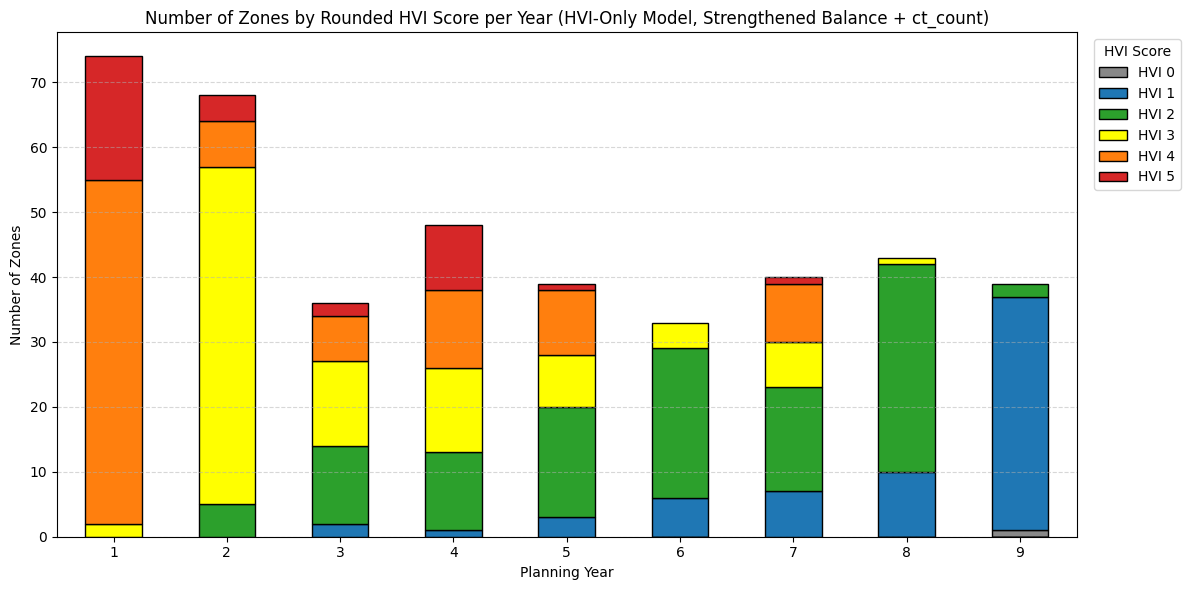

In [31]:
# Step 1: Extract assigned zones from model4
data = []

for var in model4.variables():
    if var.name.startswith("x_") and var.varValue == 1:
        # Parse variable name: x_{i}_{j}
        parts = var.name.split("_")
        i = "_".join(parts[1:-1])  # handle zone names with underscores
        j = int(parts[-1])
        hvi = hvi_scores[i]
        data.append({"Zone": i, "Year": j + 1, "HVI": hvi})

df = pd.DataFrame(data)

df['HVI_bin'] = df['HVI'].round().astype(int)

# Now define discrete levels based on the rounded values present
hvi_levels = sorted(df['HVI_bin'].unique())

zone_counts = (
    df.groupby(['Year', 'HVI_bin'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=hvi_levels, fill_value=0)
)

# Adjust color_map for the actual hvi_levels
color_map = {
    1: "#1f77b4",  # blue
    2: "#2ca02c",  # green
    3: "#FFFF00",  # yellow
    4: "#ff7f0e",  # orange
    5: "#d62728",  # red
}
colors = [color_map.get(hvi, "#888888") for hvi in hvi_levels]  # default gray if missing

# Plot as before
ax = zone_counts.plot(
    kind="bar",
    stacked=True,
    color=colors,
    figsize=(12, 6),
    edgecolor="black"
)

plt.title("Number of Zones by Rounded HVI Score per Year (HVI-Only Model, Strengthened Balance + ct_count)")
plt.xlabel("Planning Year")
plt.ylabel("Number of Zones")
plt.xticks(rotation=0)
plt.legend(
    title="HVI Score",
    labels=[f"HVI {hvi}" for hvi in hvi_levels],
    bbox_to_anchor=(1.01, 1),
    loc='upper left'
)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


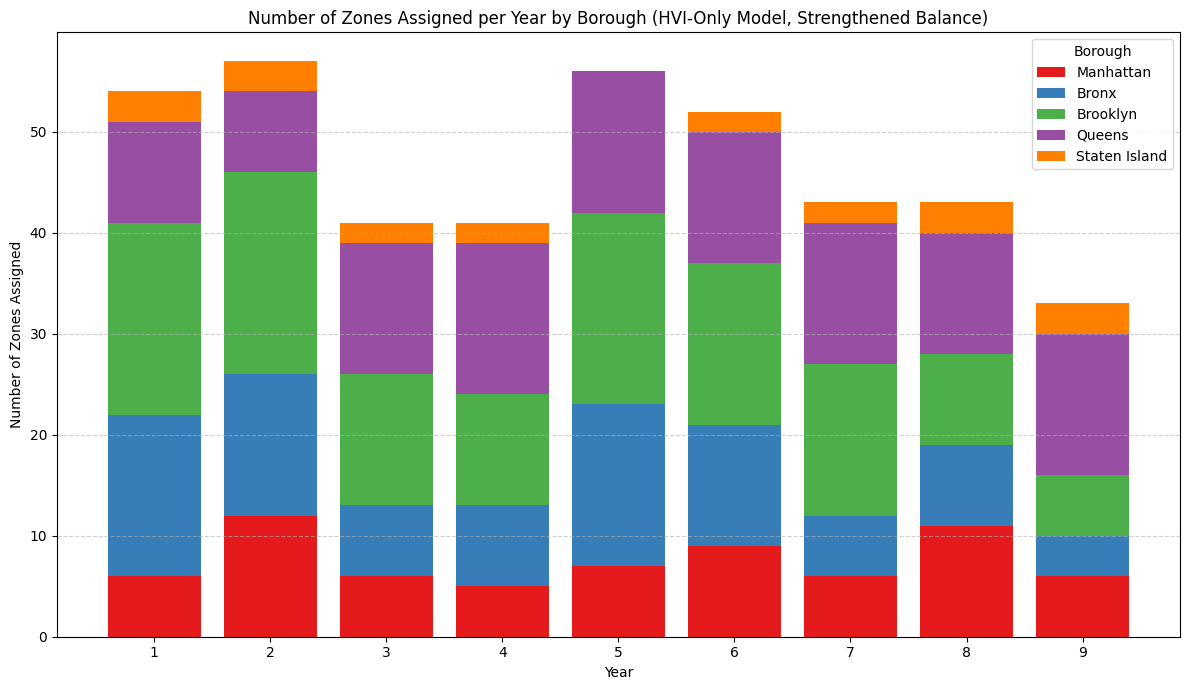

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create a matrix to hold counts: rows = boroughs (5), cols = years (9)
borough_counts = np.zeros((5, 9))

# Go through the decision variables from the solved model
for var in model4.variables():  # or model3 if you're using that
    if var.name.startswith("x_") and var.varValue == 1:
        parts = var.name.split("_")
        tract_id = f"{parts[1]}_{parts[2]}"
        year = int(parts[3])  # 0-based

        if tract_id in community_boards:
            cb_code = community_boards[tract_id]
            borough = cb_code // 100  # Extract borough code (1–5)
            borough_counts[borough - 1, year] += 1  # Adjust for 0-index

# Plotting
years = np.arange(1, 10)  # 1–9
borough_labels = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']  # Distinct colors

plt.figure(figsize=(12, 7))
bottom = np.zeros(9)

# Stack each borough
for i in range(5):
    plt.bar(years, borough_counts[i], bottom=bottom, label=borough_labels[i], color=colors[i])
    bottom += borough_counts[i]

plt.xlabel("Year")
plt.ylabel("Number of Zones Assigned")
plt.title("Number of Zones Assigned per Year by Borough (HVI-Only Model, Strengthened Balance)")
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Borough")
plt.tight_layout()
plt.show()

In [32]:
total_model_trees = sum(p[i, j].varValue for i in I for j in Y if p[i, j].varValue is not None)
print("Total trees planted by model:", total_model_trees)

max_possible_trees = sum(planning_potentials[i] for i in I)
print("Max possible trees if no constraints:", max_possible_trees)

Total trees planted by model: 137655.0
Max possible trees if no constraints: 138353


# **Checking Constraints**

In [33]:
# Check solution is feasible

for i in I:
    assigned_years = [j for j in Y if x[i, j].varValue == 1]
    assert len(assigned_years) == 1, f"Zone {i} assigned {len(assigned_years)} times"

for cb in overflow_cbs:
    for j in Y:
        total = sum(p[i, j].varValue for i in I if community_boards[i] == cb)
        allowed = 1299 + delta if overflow_cb_var[(cb, j)].varValue == 1 else 1299
        assert total <= allowed + 1e-3, f"CB {cb}, Year {j+1} exceeds allowed trees"

for unique_id, row in zones.iterrows():
    y_last = row["New Year Assignment"]
    if pd.isnull(y_last): continue
    y_last = int(y_last) - 1
    earliest_allowed = min(8, y_last + cooldown - 9)
    for j in Y:
        if j < earliest_allowed:
            assert x[unique_id, j].varValue == 0, f"Cooldown violated in zone {unique_id}, year {j+1}"

for j in Y:
    total = sum(p[i, j].varValue for i in I)
    assert 5000 <= total <= 20000, f"Year {j+1} out of bounds: {total} trees"

for j in Y:
    count = sum(overflow_cb_var[(cb, j)].varValue for cb in overflow_cbs)
    assert count <= 1 + 1e-3, f"More than one overflow CB in year {j+1}"

for cb in set(community_boards.values()):
    cb_tracts = [i for i in I if community_boards[i] == cb]
    if len(cb_tracts) > 2:
        for start in [0, 3, 6]:
            total = sum(x[i, j].varValue for i in cb_tracts for j in range(start, start+3))
            assert total >= 1, f"CB {cb} has no tracts in 3-year block starting year {start+1}"
    else:
        total = sum(x[i, j].varValue for i in cb_tracts for j in Y)
        assert abs(total - len(cb_tracts)) < 1e-3, f"CB {cb} with small size not fully scheduled"

for j in Y:
    for k in Y:
        if j < k:
            diff = abs(sum(p[i, j].varValue for i in I) - sum(p[i, k].varValue for i in I))
            assert diff <= 10000 + 1e-3, f"Year pair ({j+1}, {k+1}) exceeds deviation: {diff}"


# Current Solution

In [35]:
x = {(i, j): LpVariable(f"x_{i}_{j}", cat="Binary") for i in I for j in Y}

  # p[i,j] is the # of trees planted in zone i in year j
p = {
    (i, j): LpVariable(f"p_{i}_{j}", lowBound=0, upBound=planning_potentials[i])
    for i in I for j in Y
}

manual_objective = 0

for unique_id, row in zones.iterrows():
    assigned_year = row["New Year Assignment"]
    num_trees = row["Planting Potential"]
    hvi = row["HVI"]

    if pd.notnull(assigned_year) and pd.notnull(num_trees):
        assigned_year = int(assigned_year) - 1

        for y in Y:
          x_val = 1 if y == assigned_year else 0
          p_val = num_trees if y == assigned_year else 0

          x[(unique_id, y)].setInitialValue(x_val)

          x[(unique_id, y)].varValue = x_val

          p[(unique_id, y)].setInitialValue(p_val)
          p[(unique_id, y)].varValue = p_val


        hvi_w = hvi_weight(hvi)
        time_w = time_weight(assigned_year)

        manual_objective += hvi_w * time_w * num_trees
        print(f"Census Tract: {unique_id} is assigned to Year: {assigned_year+1}, {int(num_trees)} trees to plant")

# Print total objective
print("\nManual assignment total objective value:", round(manual_objective, 2))

# Compare to model
from pulp import value
print("Model solution objective value:", round(value(model4.objective), 2))

Census Tract: 101_1 is assigned to Year: 8, 146 trees to plant
Census Tract: 101_2 is assigned to Year: 2, 141 trees to plant
Census Tract: 101_3 is assigned to Year: 2, 172 trees to plant
Census Tract: 101_4 is assigned to Year: 5, 154 trees to plant
Census Tract: 101_5 is assigned to Year: 8, 249 trees to plant
Census Tract: 101_6 is assigned to Year: 5, 128 trees to plant
Census Tract: 101_7 is assigned to Year: 5, 97 trees to plant
Census Tract: 102_1 is assigned to Year: 8, 131 trees to plant
Census Tract: 102_2 is assigned to Year: 2, 151 trees to plant
Census Tract: 102_3 is assigned to Year: 5, 160 trees to plant
Census Tract: 102_4 is assigned to Year: 5, 141 trees to plant
Census Tract: 102_5 is assigned to Year: 5, 151 trees to plant
Census Tract: 103_1 is assigned to Year: 8, 136 trees to plant
Census Tract: 103_2 is assigned to Year: 5, 145 trees to plant
Census Tract: 103_3 is assigned to Year: 2, 143 trees to plant
Census Tract: 103_4 is assigned to Year: 2, 134 trees to